In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_particle(r_start):
    # initialize a random walker at a random position at a distance r_start from the origin
    x = r_start
    y = np.random.randint(0,mesh_y-1)
    return int(x), int(y) # these are indices of array, so they should always be integers

def check_neighbour(x, y):
    if phase[x+1,y] == 0 and phase[x-1,y] == 0 and phase[x,y-1] == 0 and phase[x,y+1] == 0:
        return "liquid"
    else:
        return "solid"
    
def check_boundary(x, y):
    if 1 < x < mesh_x-1 and 1 < y < mesh_y-1:
        return "inside"
    else:
        return "outside"

def random_walk(x, y):
    # multi-line comment using three double-quotes """
    
    random_number = np.random.random()
    if random_number < 0.25:
        x, y = x-1, y # turn left
    elif random_number < 0.5:
        x, y = x+1, y # turn right
    elif random_number < 0.75:
        x, y = x, y+1 # turn up
    else:
        x, y = x, y-1 # turn down
    return x, y

def update_r(x, y, r_max_solid, r_start_rw):
    if x>r_max_solid :
        r_max_solid = x
        r_start_rw = r_max_solid + 4
    return r_max_solid, r_start_rw

In [3]:
mesh_x = 300
mesh_y = 100
phase = np.zeros( (mesh_x, mesh_y) ) # all are liquid
# 0 = liquid, > 0 = solid
def phase1():
    for i in range (0,5):
        for j in range (0,mesh_y):
            phase[i,j]=1      #initializing solid nucleaus 
phase1()   

r_max_solid = 5
r_start_rw = r_max_solid + 5 # vary this number 5
count_solid_particles = 1
while r_start_rw < mesh_x//2 - 1:
    x, y = initialize_particle(r_start_rw)
    while check_neighbour(x, y) == "liquid":
        x, y = random_walk(x, y)
        if check_boundary(x, y) == "outside":
            break
        if check_neighbour(x, y) == "solid":
            count_solid_particles += 1
            phase[x, y] = 1 #count_solid_particles
            r_max_solid, r_start_rw = update_r(x, y, r_max_solid, r_start_rw)
            break

<IPython.core.display.Javascript object>


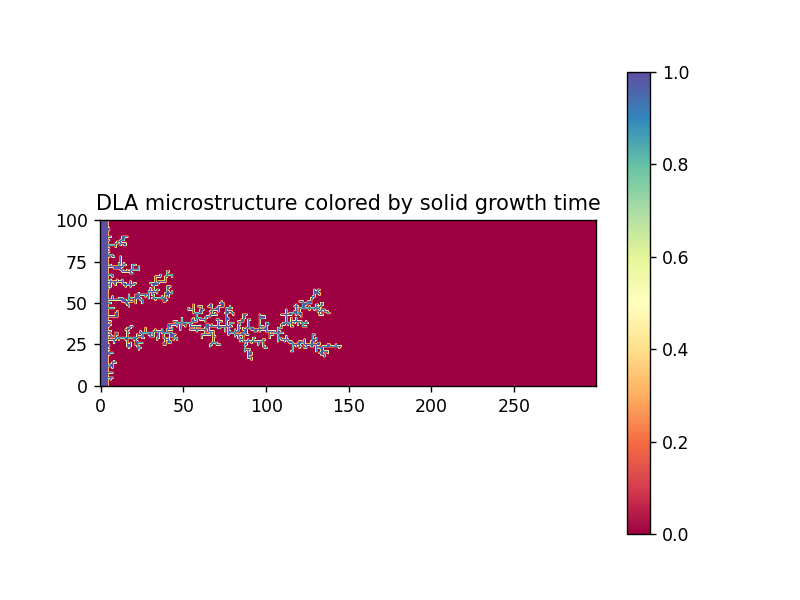

In [4]:
%matplotlib notebook
a=np.transpose(phase)
plt.imshow(a,cmap='Spectral')
plt.ylim([0,100])
plt.title('DLA microstructure colored by solid growth time')
plt.colorbar()
plt.show()